<a href="https://colab.research.google.com/github/AlexBorealis/netology_tsml_hw/blob/master/kozlov_tsml_hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from collections import defaultdict
from itertools import product
from numpy import random
%matplotlib inline
sns.set()

# ***1. Скачайте текст произведения «Война и мир»***

In [ ]:
files = [i for i in os.listdir() if i.endswith('txt')]

In [ ]:
text = []
for file in files:
    with open(file, 'r') as f:
        text_ = f.read().lower()

    text.append(text_)

In [ ]:
text = text[0] + text[1] + text[2] + text[3]

# ***2. Очистите его, оставив только русские буквы и символы пробела.***

In [27]:
cleaned_text = re.sub(r'[^а-яА-ЯёЁ\s]', '', text)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
cleaned_text = cleaned_text.strip()

# ***3. Постройте матрицу переходных вероятностей.***

In [ ]:
def build_transition_matrix(text):
    transition_counts = defaultdict(lambda: defaultdict(int))
    total_counts = defaultdict(int)

    for i in range(len(text) - 1):
        current_char = text[i]
        next_char = text[i + 1]
        if current_char != ' ' and next_char != ' ':
            transition_counts[current_char][next_char] += 1
            total_counts[current_char] += 1

    # Преобразование в матрицу вероятностей
    transition_matrix = defaultdict(dict)
    for current_char, next_chars in transition_counts.items():
        for next_char, count in next_chars.items():
            transition_matrix[current_char][next_char] = round(count / total_counts[current_char], 4)

    return transition_matrix

transition_matrix = build_transition_matrix(cleaned_text)

# ***4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».***

In [ ]:
all4 = [i for i in cleaned_text.split(' ') if len(i) == 4]
allPR = [i for i in filter(lambda x: x.startswith('п') and x.endswith('р'), all4)]
# allPR = sum([re.findall(r'\bп[a-яё]*р\b', i) for i in all4], [])

print(f'Вероятность встретить строку из четырех символов, начинающуюся на "П" и заканчивающуюся на "Р": {len(allPR)/len(all4):.4f}')

Вероятность встретить строку из четырех символов, начинающуюся на "П" и заканчивающуюся на "Р": 0.0339


# ***5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.***

# Случайное слово

In [ ]:
transition_matrix['б']

{'о': 0.1503,
 'е': 0.1441,
 'л': 0.0535,
 'ы': 0.2767,
 'у': 0.0702,
 'я': 0.0298,
 'а': 0.0662,
 'щ': 0.0137,
 'м': 0.0027,
 'к': 0.0141,
 'р': 0.0771,
 'и': 0.0494,
 'ъ': 0.0069,
 'б': 0.0006,
 'н': 0.0195,
 'в': 0.0055,
 'с': 0.005,
 'х': 0.0067,
 'ь': 0.0025,
 'д': 0.0015,
 'г': 0.0007,
 'ж': 0.0005,
 'ш': 0.0003,
 'ч': 0.0014,
 'э': 0.0,
 'ю': 0.0003,
 'т': 0.0005,
 'ц': 0.0002,
 'з': 0.0001,
 'ё': 0.0}

In [ ]:
keys = list(transition_matrix['б'].keys())
values = list(transition_matrix['б'].values())

total = sum(values)
normalized_probabilities = [v / total for v in values]

'б' + ''.join(list(np.random.choice(keys, 7, replace=True, p=normalized_probabilities)))

'былыоыыу'

# Максимально вероятное слово при первом "Б"

In [ ]:
sorted_transition_matrix = dict(sorted(transition_matrix['б'].items(), key=lambda item: item[1], reverse=True))
sorted_transition_matrix

{'ы': 0.2767,
 'о': 0.1503,
 'е': 0.1441,
 'р': 0.0771,
 'у': 0.0702,
 'а': 0.0662,
 'л': 0.0535,
 'и': 0.0494,
 'я': 0.0298,
 'н': 0.0195,
 'к': 0.0141,
 'щ': 0.0137,
 'ъ': 0.0069,
 'х': 0.0067,
 'в': 0.0055,
 'с': 0.005,
 'м': 0.0027,
 'ь': 0.0025,
 'д': 0.0015,
 'ч': 0.0014,
 'г': 0.0007,
 'б': 0.0006,
 'ж': 0.0005,
 'т': 0.0005,
 'ш': 0.0003,
 'ю': 0.0003,
 'ц': 0.0002,
 'з': 0.0001,
 'э': 0.0,
 'ё': 0.0}

In [ ]:
'б' + ''.join(list(sorted_transition_matrix.keys())[:8])

'быоеруали'

# ***6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.***

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM

series = pd.read_csv("/content/monthly-boston-armed-robberies-j.csv")["Count"]
values = series.values.reshape(-1,1)

for n in range(1, 80, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -739.512376545524
11 -557.7554737579952


21 -481.24367000663347


31 -483.8590094046462


41 -432.48645053295047


51 -364.86277215346587


61 -401.6167807664248
71 -402.89066898806175


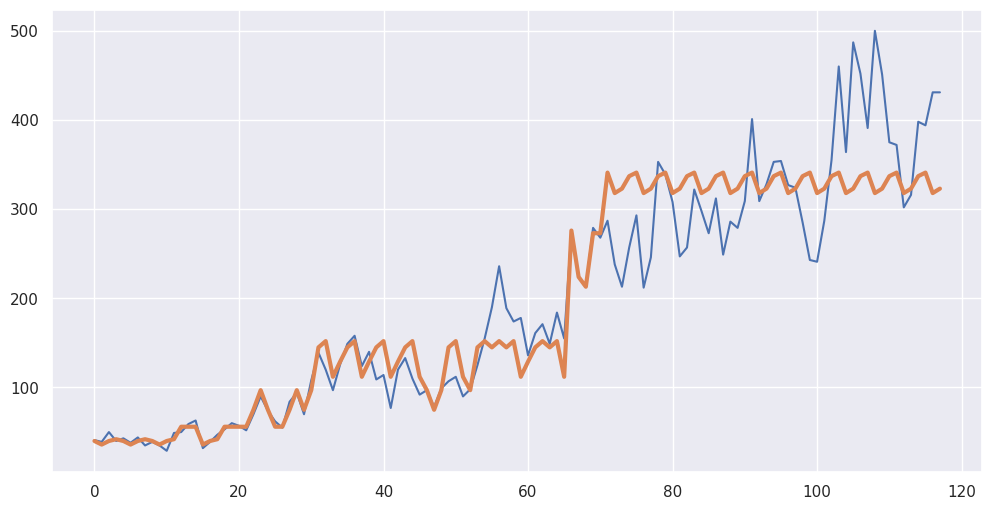

In [ ]:
model = GaussianHMM(n_components=20,
                    covariance_type="diag",
                    n_iter=1000,
                    random_state=44)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

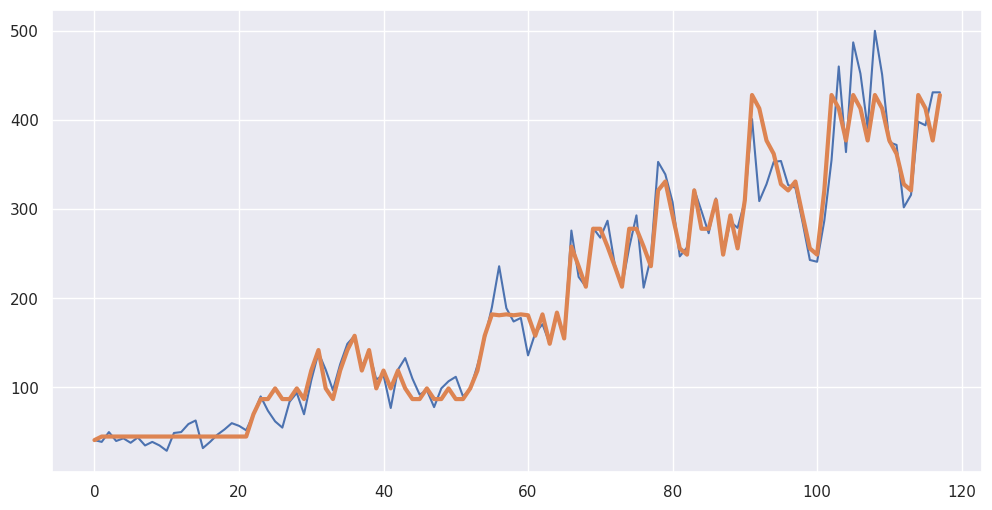

In [ ]:
model = GaussianHMM(n_components=40,
                    covariance_type="diag",
                    n_iter=1000,
                    random_state=44)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

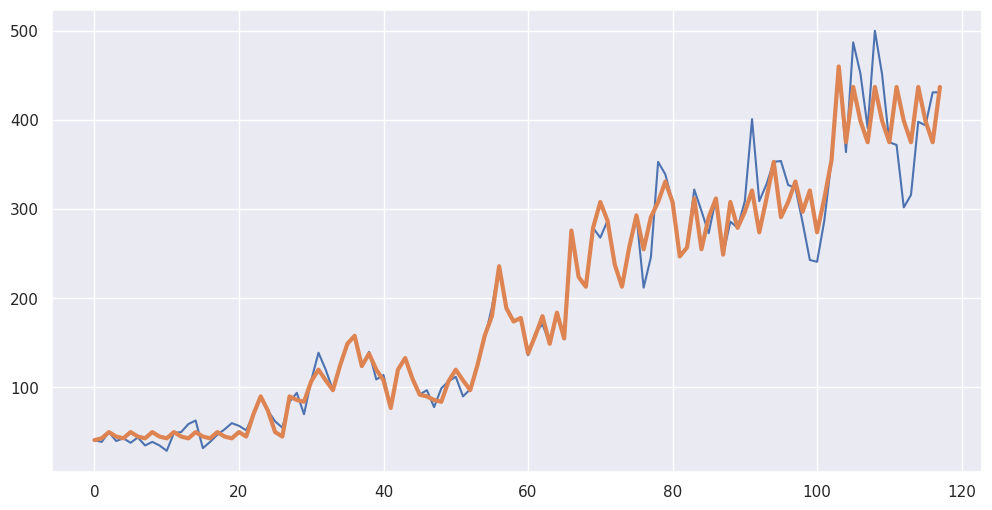

In [ ]:
model = GaussianHMM(n_components=80,
                    covariance_type="diag",
                    n_iter=1000,
                    random_state=44)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)